In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%run -i helpers.py

In [109]:
# SVM
# ---

def loss(x, y, C, w):
    return 0.5 * np.dot(w, w) + C * sum( max(0, 1 - y[i] * np.dot(w, x[i])) for i in range(len(x)) )

def SVM(x, y, c, learning_rate, iters):
    
    n = len(x)
    
    x = np.array([ np.hstack( (x[i], [-1]) ) for i in range(n) ])
    
    w = 0.001 * np.random.randn(3)
    
    for _ in range(iters):
        # Print loss
        #print(loss(x, y, c, w))
        # Calculate gradient
        gradient = np.zeros(3)
        for i in range(n):
            violation = 1 - y[i] * np.dot(w, x[i]) > 0
            if violation:
                gradient -= y[i] * x[i]
        gradient *= c
        gradient += w
        # Descend
        w -= learning_rate * gradient
    
    print("W given by gradient descent: ", w)
    print(" loss = ", loss(x, y, c, w))
    
    return w

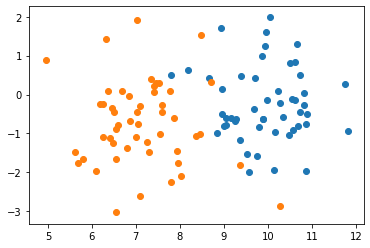

In [103]:
# SAMPLING
# --------

# Parameters
DISPLACEMENT = np.array([8, 0])
DISPERSE = 8

N_1 = 50
MU_1 = [2.0, -0.1] + DISPLACEMENT
SIGMA_1 = np.array([[0.1, 0.0],
                   [0.0, 0.1]]) * DISPERSE
N_2 = 50
MU_2 = [-1.0, -1.0] + DISPLACEMENT
SIGMA_2 = np.array([[0.1, 0.0],
                    [0.0, 0.1]]) * DISPERSE

# Sample
X_1 = np.random.multivariate_normal(MU_1, SIGMA_1, N_1)
X_2 = np.random.multivariate_normal(MU_2, SIGMA_2, N_2)

# Unify
X = np.vstack( (X_1, X_2) )
Y = np.array([1] * N_1 + [-1] * N_2)

# Plot
plt.scatter(X_1[:,0], X_1[:,1], c='tab:blue')
plt.scatter(X_2[:,0], X_2[:,1], c='tab:orange')
plt.show()

W given by gradient descent:  [0.58118969 0.28701981 4.76304559]
 loss =  41.21214272193551


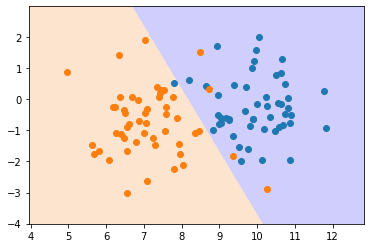

In [115]:
# RUN
# ---

C = 1    
LEARNING_RATE = 0.001
ITERS = 100

w = SVM(X, Y, C, LEARNING_RATE, ITERS)
#w = ([ 1., 0., 8. ])
nx = 500
ny = 500

xx, yy = np.meshgrid(np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, nx),
                     np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, ny))
Z = np.empty(xx.shape)
for iy in range(ny):
    for ix in range(nx):
        xxx = xx[iy, ix]
        yyy = yy[iy, ix]
        decision_func = xxx * w[0] + yyy * w[1] - w[2]
        Z[iy, ix] = 2 if decision_func >= 0 else 1

cm = LinearSegmentedColormap.from_list('binary', [(1,0.9,0.8), (0.8,0.8,1)])

plt.contourf(xx, yy, Z, cmap=cm)
plt.scatter(X_1[:,0], X_1[:,1], c='tab:blue')
plt.scatter(X_2[:,0], X_2[:,1], c='tab:orange')
plt.show()

In [108]:
w_mejor = np.array
x2 = np.array([ np.hstack( (X[i], [-1]) ) for i in range(len(X)) ])
loss(x2, Y, C, w_mejor)


56.94575411544968